# **Machine Learning Terapan 1 - Diabetes Prediction**

Oleh: M. Zidan Richal Fajril Falah

Proyek ini bertujuan untuk membuat model *predictive analysis* terhadap penyakit diabetes menggunakan dataset [**Pima Indians Diabetes Database**](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) yang tersedia di Kaggle.

## **Import Library**

Pada tahap ini, kita akan mengimpor semua library Python yang dibutuhkan untuk analisis data, visualisasi, dan pemodelan machine learning.

In [1]:
# ===== Built-in libraries =====
import os
import warnings
warnings.filterwarnings('ignore')

# ===== Third-party libraries =====
# -- Data Loading & Manipulation --
import numpy as np
import pandas as pd

# -- Data Visualization --
import matplotlib.pyplot as plt
import seaborn as sns

# -- Data Source --
import kagglehub

# -- Data Cleaning & Preparation --
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# -- Data Splitting & Model Selection --
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# -- Modeling Algorithms --
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# -- Evaluation Metrics --
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

## **1. Data Understanding**

Pada tahap ini, kita akan memahami data yang akan digunakan dalam proyek ini. Proses ini meliputi pengumpulan data, pemahaman struktur data, dan eksplorasi awal untuk mendapatkan insight penting.

### 1.1 Data Loading

Dataset yang digunakan dalam proyek ini adalah dataset Pima Indians Diabetes yang tersedia di Kaggle. Dataset ini akan diunduh menggunakan library kagglehub. Proses ini akan otomatis mengunduh dataset ke direktori yang sesuai.

In [2]:
# Download dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
file_path = os.path.join(path, "diabetes.csv")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


Dataset yang telah diunduh kemudian akan dibaca menggunakan library pandas dan disimpan dalam dataframe `df` Tampilan awal dataframe akan ditampilkan untuk memastikan data telah termuat dengan benar.

In [3]:
# Load Dataset
df = pd.read_csv(file_path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.2 Exploratory Data Analysis - Deskripsi Variabel

Pada tahap ini kita menggunakan `df.info()` melihat, memahami tipe data, distribusi, dan statistik deskriptif dataset.

In [4]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


🔍 **Insight Deskripsi Variabel**

Dataset ini berisi informasi tentang karakteristik kesehatan pasien yang digunakan untuk memprediksi kemungkinan diabetes. Dataset ini terdiri dari **768 sampel (baris) dan 9 fitur (kolom)**. Berikut adalah deskripsi untuk setiap kolom:

- 🤰 **Pregnancies**: Jumlah kehamilan yang pernah dialami oleh pasien. Ini adalah fitur numerik dengan tipe data integer.
- 🍬 **Glucose**: Konsentrasi glukosa plasma dalam darah setelah 2 jam dalam tes toleransi glukosa oral. Ini adalah fitur numerik dengan tipe data integer.
- 💓 **BloodPressure**: Tekanan darah diastolik (mm Hg). Ini adalah fitur numerik dengan tipe data integer.
- 📏 **SkinThickness**: Ketebalan lipatan kulit trisep (mm). Ini adalah fitur numerik dengan tipe data integer.
- 💉 **Insulin**: Kadar insulin serum setelah 2 jam dalam tes toleransi glukosa oral (mu U/ml). Ini adalah fitur numerik dengan tipe data integer.
- ⚖️ **BMI**: Indeks Massa Tubuh (Body Mass Index) dihitung dengan berat dalam kg / (tinggi dalam meter)^2. Ini adalah fitur numerik dengan tipe data float.
- 🧬 **DiabetesPedigreeFunction**: Fungsi riwayat keluarga diabetes, yaitu suatu nilai yang menunjukkan kemungkinan diabetes berdasarkan riwayat keluarga. Ini adalah fitur numerik dengan tipe data float.
- 🎂 **Age**: Usia pasien (tahun). Ini adalah fitur numerik dengan tipe data integer.
- ✅ **Outcome**: Variabel target yang menunjukkan apakah pasien didiagnosis diabetes (1) atau tidak (0). Ini adalah fitur kategorikal (biner) dengan tipe data integer.


### 1.3 Exploratory Data Analysis - Univariate Analysis

Pada tahap ini, kita akan melakukan *Univariate Analysis* untuk memahami karakteristik setiap fitur dalam dataset secara individual. *Univariate Analysis* melibatkan eksplorasi distribusi dan pola dari setiap variabel tanpa mempertimbangkan hubungannya dengan variabel lain.

Untuk melakukan univariate analysis, kita akan menghitung *Statistik Deskriptif* dan menggunakan visualisasi *Histogram* untuk setiap fitur numerik dalam dataset.

#### 1.3.1 Statistik Deskriptif

Untuk melakukan statistik deskriptif kita menggunakan `.describe()` untuk melihat ringkasan statistik dataset seperti nilai rata-rata, median, standar deviasi, minimum, dan maksimum, akan memberikan informasi numerik tentang karakteristik data.

In [5]:
# Menampilkan statistik deskriptif
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


🔍 **Insight Statistik Deskriptif**

Statistik deskriptif memberikan gambaran umum tentang karakteristik data. Berikut adalah beberapa insight yang didapatkan dari hasil `df.describe()`:

- 🤰 **Pregnancies**: Rata-rata jumlah kehamilan adalah **3.85**, dengan nilai minimum **0** dan maksimum **17**. Terdapat beberapa pasien yang tidak pernah hamil (nilai **0**) dan beberapa pasien dengan jumlah kehamilan yang sangat tinggi. Nilai **0** mungkin mengindikasikan data yang tidak valid atau pasien yang belum pernah hamil.
- 🍬 **Glucose**: Rata-rata kadar glukosa adalah **120.89**, dengan nilai minimum **0** dan maksimum **199**. Terdapat kemungkinan adanya *outlier* atau nilai yang tidak valid, khususnya nilai **0**.
- 💓 **BloodPressure**: Rata-rata tekanan darah adalah **69.11**, dengan nilai minimum **0** dan maksimum **122**. Nilai **0** mengindikasikan kemungkinan data yang tidak valid.
- 📏 **SkinThickness**: Rata-rata ketebalan lipatan kulit adalah **20.54**, dengan nilai minimum **0** dan maksimum **99**. Kemungkinan terdapat *outlier* atau data tidak valid.
- 💉 **Insulin**: Rata-rata kadar insulin adalah **79.80**, dengan nilai minimum **0** dan maksimum **846**. Fitur ini memiliki rentang nilai yang sangat lebar dan kemungkinan terdapat *outlier*.
- ⚖️ **BMI**: Rata-rata BMI adalah **31.99**, dengan nilai minimum **0** dan maksimum **67.1**. Nilai **0** mengindikasikan kemungkinan adanya data tidak valid.
- 🧬 **DiabetesPedigreeFunction**: Rata-rata fungsi riwayat keluarga diabetes adalah **0.47**, dengan nilai minimum **0.08** dan maksimum **2.42**. Ini menunjukkan bahwa sebagian besar pasien memiliki riwayat keluarga diabetes yang relatif rendah.
- 🎂 **Age**: Rata-rata usia pasien adalah **33.24 tahun**, dengan usia termuda **21 tahun** dan tertua **81 tahun**. Usia pasien relatif muda, dengan sebagian besar pasien berusia di bawah 50 tahun.
- ✅ **Outcome**: Sekitar **34.9% pasien** (268 dari 768) didiagnosis menderita diabetes (**Outcome = 1**). Ini menunjukkan adanya ketidakseimbangan kelas yang perlu diperhatikan.

📌 **Kesimpulan:**

Beberapa fitur seperti **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, dan **BMI** memiliki nilai **0** yang tidak realistis. Hal ini perlu ditangani pada tahap *data cleaning* dengan strategi seperti penghapusan, imputasi, atau transformasi. Selain itu, distribusi target menunjukkan adanya **ketidakseimbangan kelas** yang perlu diperhatikan pada tahap pelatihan model, misalnya dengan menggunakan teknik **oversampling**, **undersampling**, atau **penyesuaian class weight**.


#### 1.3.2 Histogram

Untuk memvisualisasikan distribusi data dan frekuensi kemunculan nilai dalam rentang tertentu, kita menggunakan histogram. Berikut ini adalah histogram dari setiap fitur dalam dataset (kecuali 'Outcome'), yang dibuat menggunakan library `matplotlib.pyplot` dan `seaborn.`

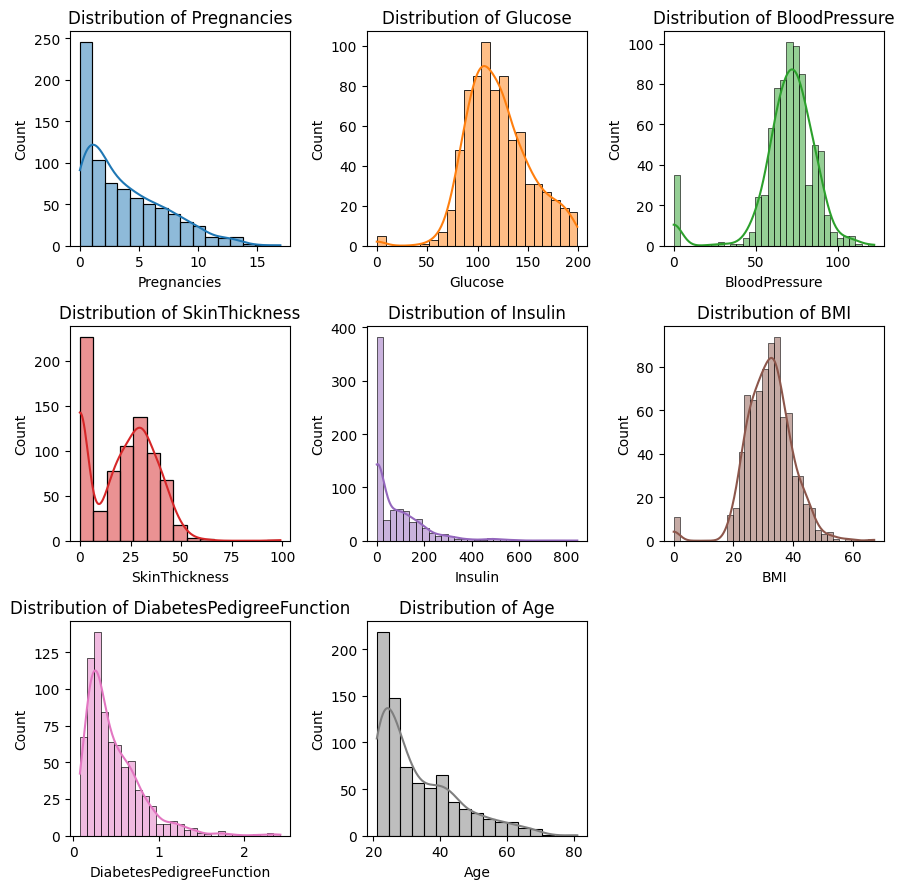

In [6]:
# Histogram Univariate Analysis

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df.drop('Outcome', axis=1).columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color=sns.color_palette()[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

🔍 **Insight Histogram**

Berikut adalah beberapa insight yang didapatkan:

*   🤰 **Pregnancies:** Distribusi Pregnancies cenderung menceng ke kanan (right-skewed), dengan sebagian besar pasien memiliki jumlah kehamilan yang rendah. Terdapat beberapa outlier dengan jumlah kehamilan yang tinggi.
*   🍬 **Glucose:** Distribusi Glucose relatif normal, dengan sebagian besar nilai terpusat di sekitar rata-rata. Namun, terdapat beberapa nilai **0** yang tidak realistis dan perlu diinvestigasi lebih lanjut.
*   💓 **BloodPressure:** Distribusi BloodPressure mendekati normal, tetapi terdapat beberapa nilai **0** yang tidak valid.
*   📏 **SkinThickness:** Distribusi SkinThickness menceng ke kanan, dengan banyak nilai **0** yang perlu ditangani.
*   💉 **Insulin:** Distribusi Insulin sangat menceng ke kanan dan memiliki banyak outlier. Sebagian besar nilai terpusat di sekitar **0**, tetapi terdapat beberapa nilai yang sangat tinggi.
*   ⚖️ **BMI:** Distribusi BMI mendekati normal, tetapi terdapat beberapa nilai **0** yang tidak valid.
*   🧬 **DiabetesPedigreeFunction:** Distribusi DiabetesPedigreeFunction menceng ke kanan, menunjukkan bahwa sebagian besar pasien memiliki riwayat keluarga diabetes yang rendah.
*   🎂 **Age:** Distribusi Age menceng ke kanan, dengan sebagian besar pasien berusia relatif muda. Terdapat beberapa outlier dengan usia yang lebih tua.

📌 **Kesimpulan:**

Beberapa fitur, seperti **Pregnancies**, **SkinThickness**, **Insulin**, dan **DiabetesPedigreeFunction**, memiliki distribusi yang menceng. Hal ini perlu dipertimbangkan saat melakukan pemodelan. Selain itu, terdapat nilai **0** yang tidak valid pada beberapa fitur, seperti **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, dan **BMI**. Nilai-nilai ini perlu ditangani pada tahap data cleaning.

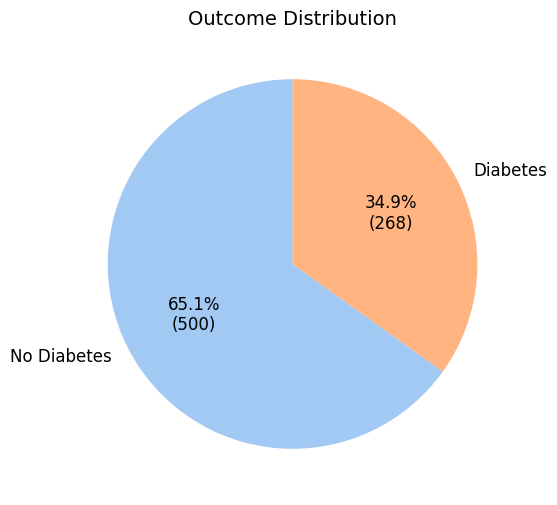

In [7]:
# Visualisasi data untuk label outcome
outcome_counts = df['Outcome'].value_counts()
labels = ['No Diabetes', 'Diabetes']
sizes = outcome_counts.values
colors = sns.color_palette('pastel')

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90,
        textprops={'fontsize': 12})
plt.title('Outcome Distribution', fontsize=14)
plt.show()

### 1.4 Exploratory Data Analysis - Multivariate Analysis

Pada tahap ini, kita akan melakukan *Multivariate Analysis* untuk memahami hubungan antar fitur dalam dataset. *Multivariate Analysis* melibatkan eksplorasi hubungan dan pola antara dua atau lebih variabel secara bersamaan.

Untuk melakukan *Multivariate Analysis*, kita akan menggunakan visualisasi *Pair Plot* dan *Correlation Matrix*.

#### 1.4.1 Pair Plot

*Pair plot* akan menampilkan scatter plot untuk setiap pasangan fitur dan histogram untuk setiap fitur individual, memungkinkan kita untuk melihat hubungan dan distribusi data secara visual.

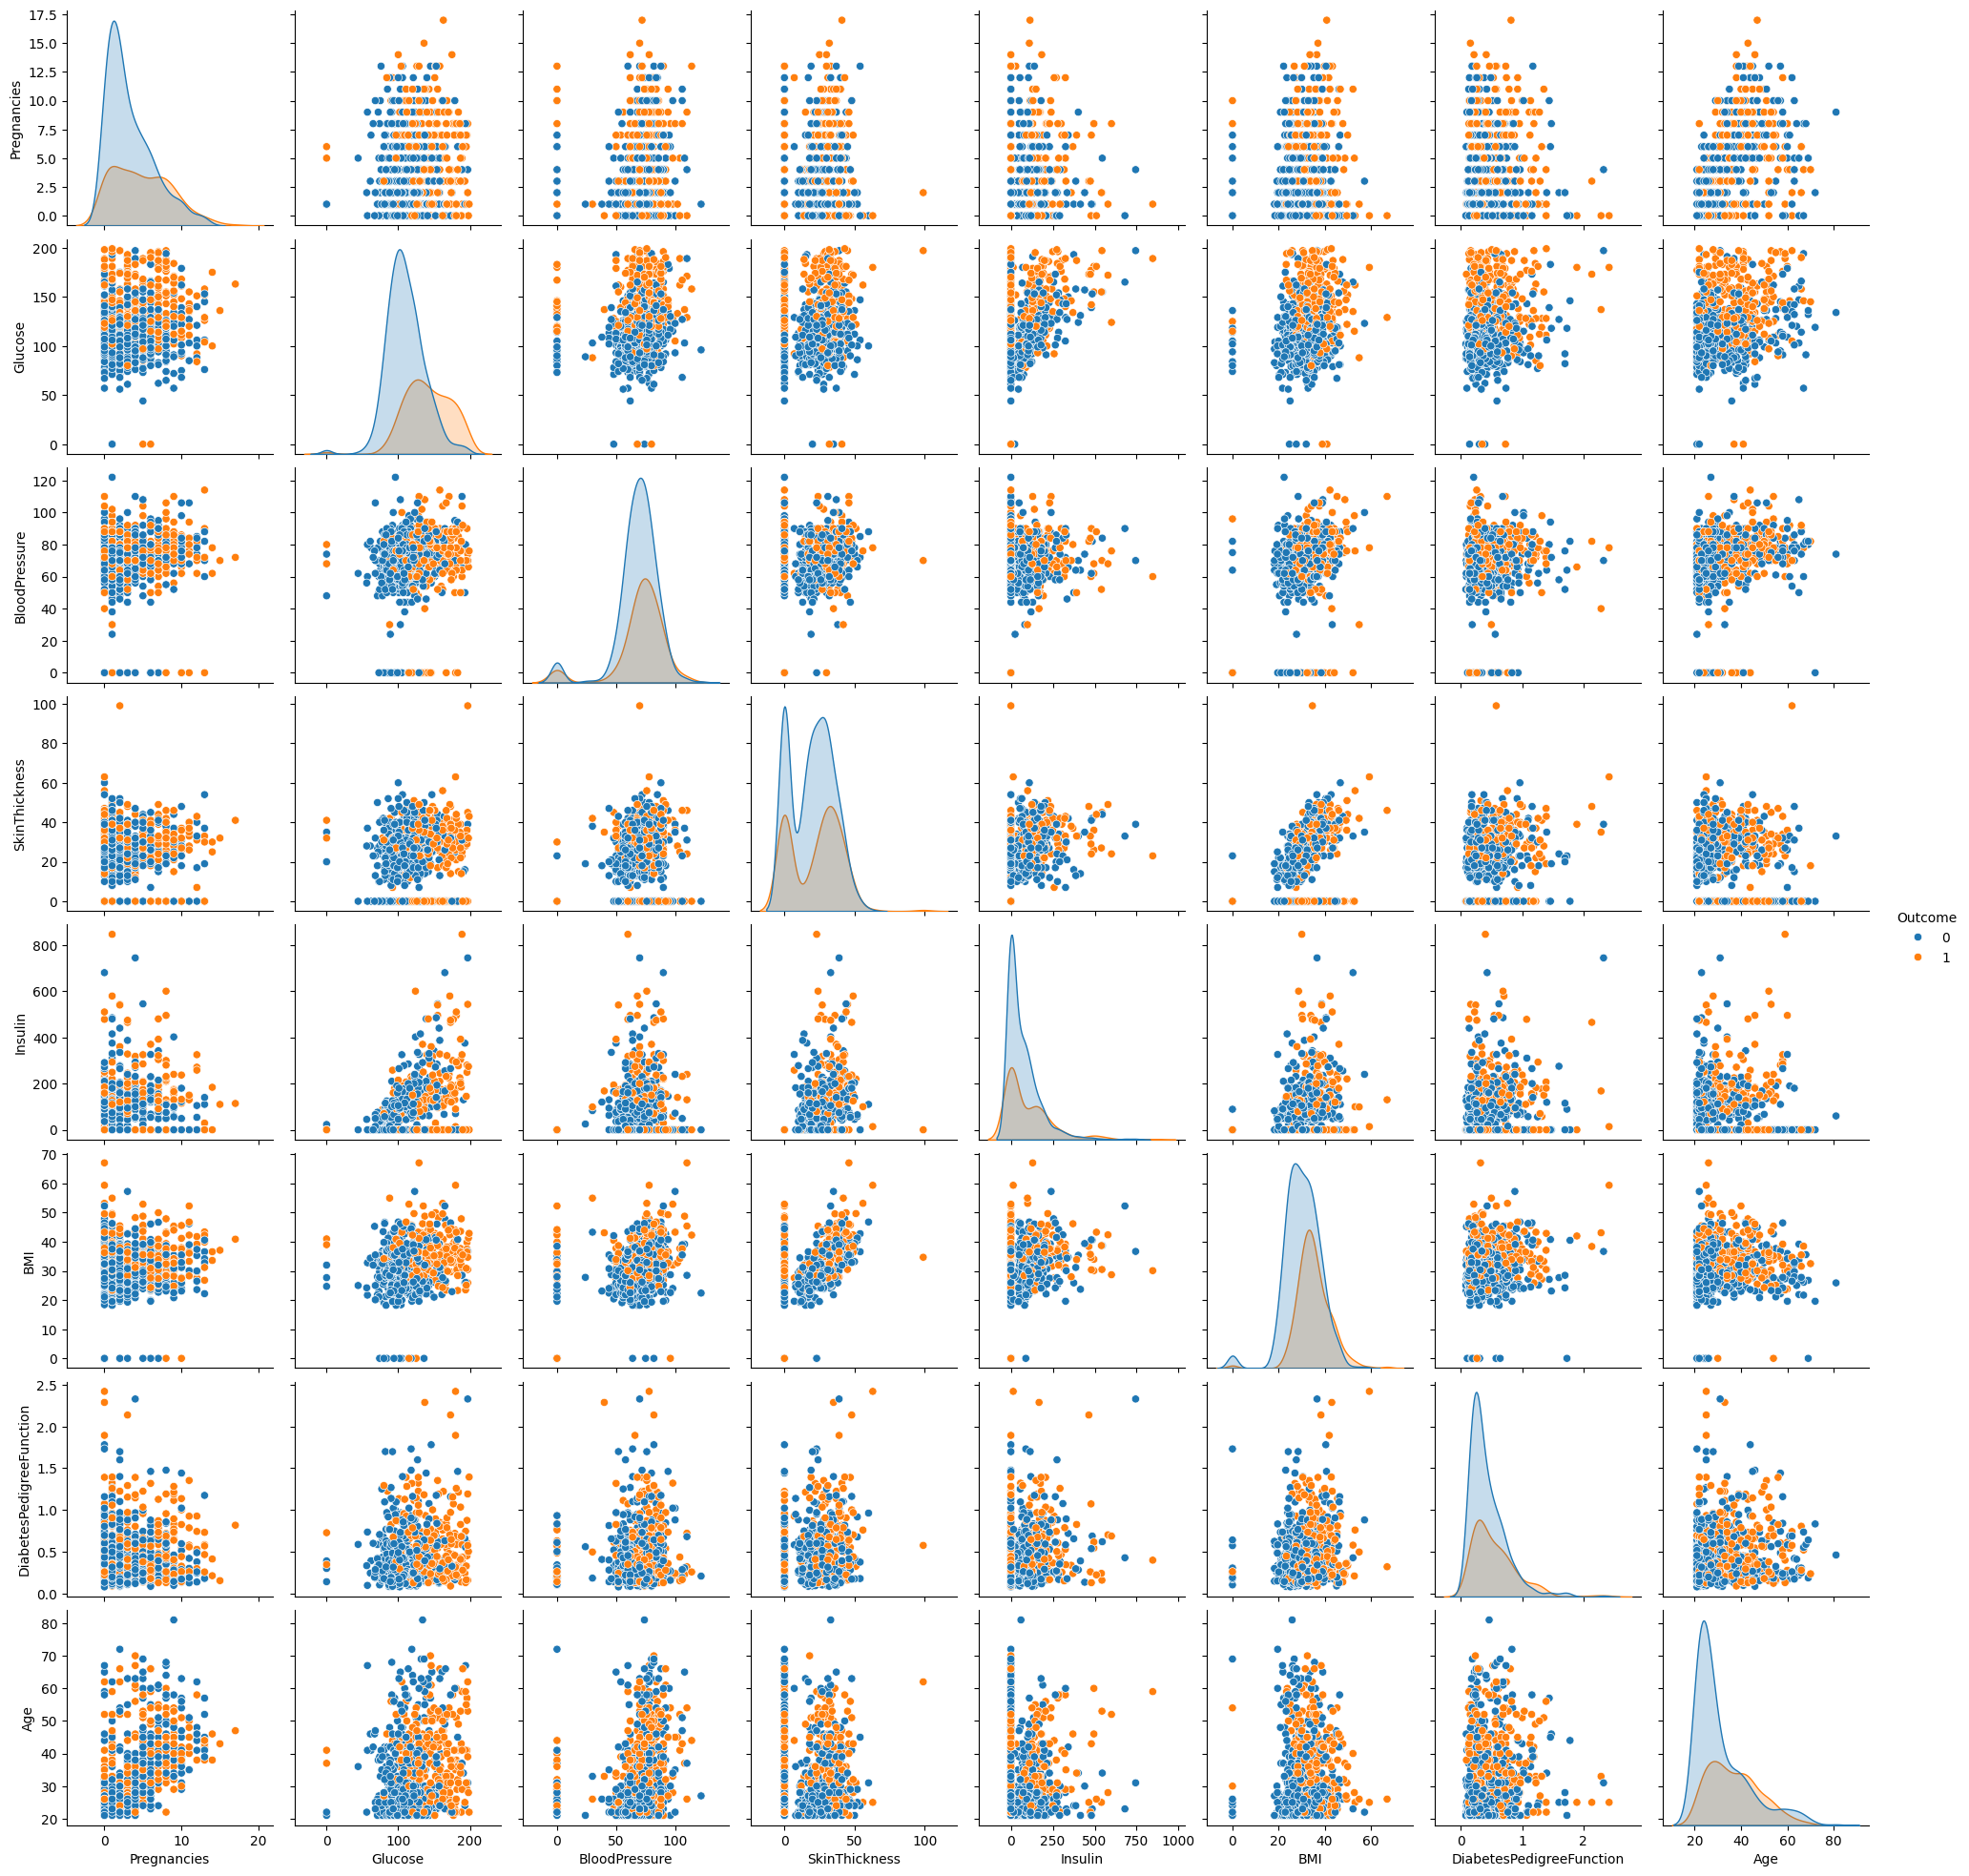

In [8]:
# Pairplot
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

🔍 **Insight Pair Plot**

Pair plot memberikan visualisasi hubungan antar fitur dalam dataset. Berikut adalah beberapa insight yang didapatkan:

*   🍬✅ **Hubungan Glucose dan Outcome:** Terlihat bahwa pasien dengan kadar glukosa yang lebih tinggi cenderung memiliki kemungkinan lebih besar untuk didiagnosis diabetes (Outcome = 1). Scatter plot antara Glucose dan Outcome menunjukkan pemisahan yang cukup jelas antara kedua kelompok.
*   🎂✅ **Hubungan Age dan Outcome:** Usia juga tampaknya berkorelasi dengan diabetes. Pasien yang lebih tua cenderung memiliki risiko diabetes yang lebih tinggi.
*   ⚖️✅ **Hubungan BMI dan Outcome:** BMI yang lebih tinggi juga dikaitkan dengan peningkatan risiko diabetes. Terdapat pola yang menunjukkan bahwa pasien dengan BMI tinggi lebih cenderung didiagnosis diabetes.
*   💉🍬 **Hubungan Insulin dan Glucose:** Terdapat korelasi positif antara Insulin dan Glucose, yang menunjukkan bahwa pasien dengan kadar glukosa tinggi cenderung memiliki kadar insulin yang tinggi pula. Namun, pola ini tidak terlalu kuat.
*   🤰🎂 **Hubungan Pregnancies dan Age:** Terdapat korelasi positif antara jumlah kehamilan (Pregnancies) dan usia (Age), yang merupakan hal yang wajar.
*   🔗 **Korelasi antar Fitur Lain:** Secara umum, korelasi antar fitur lainnya tampak lemah atau tidak signifikan.

📌 **Kesimpulan:**

Dari pair plot, dapat disimpulkan bahwa fitur-fitur seperti **Glucose**, **Age**, dan **BMI** memiliki hubungan yang cukup kuat dengan **Outcome** (diabetes). Fitur-fitur ini berpotensi menjadi prediktor yang baik dalam model machine learning. Hubungan antar fitur lainnya perlu diinvestigasi lebih lanjut untuk menentukan signifikansinya.


#### 1.4.2 Correlation Matrix

*Correlation matrix* akan menunjukkan korelasi antar fitur dalam bentuk tabel, dengan nilai korelasi berkisar antara -1 hingga 1.

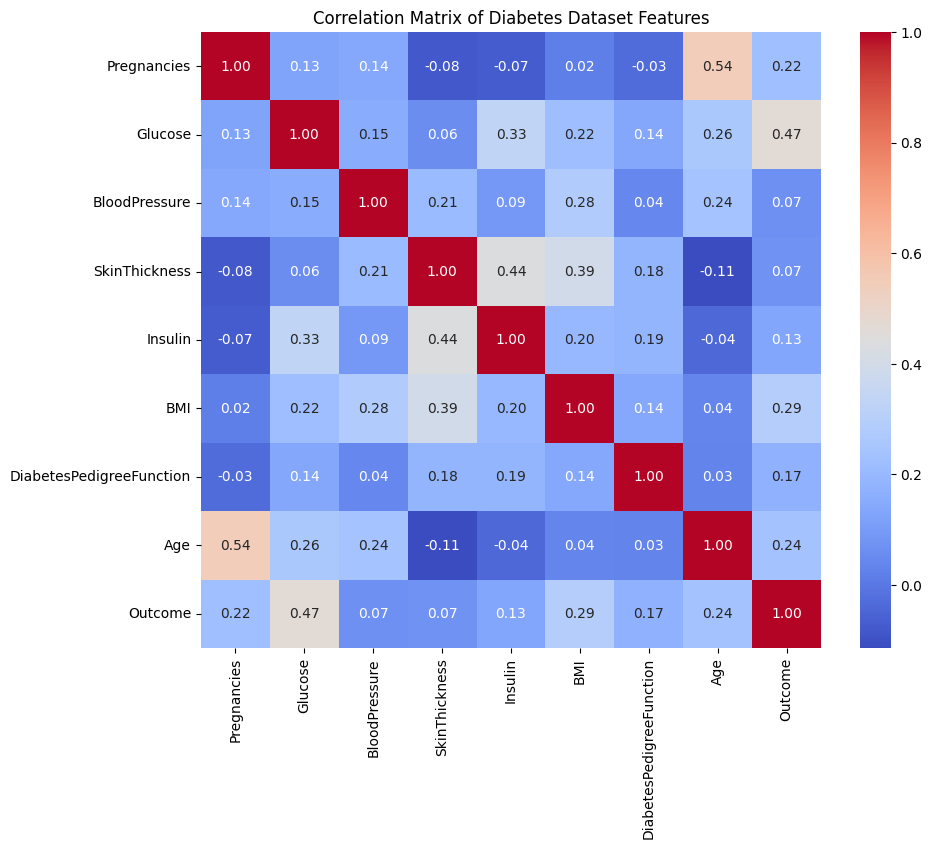

In [9]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

🔍 **Insight Correlation Matrix**

Visualisasi korelasi antar fitur dilakukan untuk memahami hubungan linear antar variabel dalam dataset. Korelasi diukur dengan koefisien Pearson, yang memiliki rentang antara -1 (hubungan negatif sempurna) hingga 1 (hubungan positif sempurna). Berikut insight yang diperoleh:

- 🔗 **Korelasi terhadap Variabel Target (Outcome)**

  - 🍬 **Glucose (0.47)** memiliki korelasi tertinggi dengan Outcome, menandakan bahwa kadar glukosa darah sangat berperan dalam prediksi diabetes.
  - ⚖️ **BMI (0.29)** menunjukkan korelasi sedang; kelebihan berat badan berkontribusi terhadap risiko diabetes.
  - 🎂 **Age (0.24)** memiliki korelasi positif rendah, menunjukkan semakin tua usia, semakin tinggi kemungkinan mengidap diabetes.
  - 🤰 **Pregnancies (0.22)** juga berkorelasi positif terhadap Outcome; jumlah kehamilan dapat menjadi indikator awal risiko diabetes.
  - 💉 **Insulin (0.13)**, 📏 **SkinThickness (0.07)**, dan 💓 **BloodPressure (0.07)** memiliki korelasi sangat rendah terhadap Outcome.

- 🔗 **Korelasi Antar Variabel Fitur**

  - 🤰🎂 **Pregnancies dan Age (0.54)** memiliki korelasi cukup kuat, mengindikasikan bahwa usia berkorelasi positif dengan jumlah kehamilan.
  - 💉📏 **Insulin dan SkinThickness (0.44)** serta 📏⚖️ **SkinThickness dan BMI (0.39)** memiliki korelasi sedang. Hubungan ini logis secara medis karena berkaitan dengan metabolisme dan lemak tubuh.
  - Korelasi antar fitur lainnya tergolong rendah, menandakan minimnya multikolinearitas dalam dataset.

📌 **Kesimpulan**

Fitur **Glucose**, **BMI**, **Age**, dan **Pregnancies** menjadi kandidat utama dalam proses pemodelan karena memiliki korelasi tertinggi dengan target variabel. Sementara fitur lain seperti **Insulin**, **SkinThickness**, dan **BloodPressure** menunjukkan hubungan yang lemah secara linear, namun tetap bisa mengandung informasi penting secara non-linear, khususnya untuk algoritma seperti **Random Forest** atau **Gradient Boosting**.

Jika dimungkinkan, dilakukan feature engineering untuk menangkap interaksi non-linear antar fitur.

Selain itu, normalisasi atau transformasi logaritmik juga bisa dipertimbangkan untuk fitur dengan distribusi miring agar hasil modeling lebih optimal.


### 1.5 Identifikasi Potensi Masalah

berdasarkan hasil EDA yang telah dilakukan sebelumnya, berikut potensi masalah yang teridentifikasi dan perlu diatasi:

#### 1.5.1 Nilai 0 yang Tidak Realistis

Beberapa fitur, seperti Glucose, BloodPressure, SkinThickness, Insulin, dan BMI, memiliki nilai 0 yang tidak realistis secara medis. Ini menunjukkan adanya missing values atau kesalahan input data. Nilai-nilai ini perlu ditangani sebelum pemodelan.

Beberapa Solusi:

- **Imputasi**: Mengganti nilai 0 dengan nilai lain, seperti mean, median, atau nilai yang diprediksi menggunakan metode imputasi seperti KNNImputer.
- **Penghapusan**: Menghapus baris data yang memiliki nilai 0 pada fitur-fitur tersebut, tetapi ini dapat mengurangi jumlah data dan berpotensi menghilangkan informasi penting.

#### 1.5.2 Outliers

Beberapa fitur, seperti Insulin, SkinThickness, dan Pregnancies, memiliki outliers yang dapat mengganggu kinerja model.

Beberapa Solusi:

- **Transformasi**: Menerapkan transformasi logaritmik atau Box-Cox untuk mengurangi pengaruh outliers.
- **Winsorizing**: Membatasi nilai ekstrem pada persentil tertentu untuk mengurangi dampak outliers.
- **Penghapusan**: Menghapus data outliers, tetapi ini perlu dilakukan dengan hati-hati agar tidak menghilangkan informasi penting.

#### 1.5.3 Data Imbalance

Terdapat ketidakseimbangan jumlah data antara kelas 0 (tidak diabetes) dan kelas 1 (diabetes) pada variabel target ('Outcome'). Ini dapat menyebabkan model cenderung memprediksi kelas mayoritas dan kurang akurat dalam memprediksi kelas minoritas.

Beberapa Solusi:

- **Oversampling**: Meningkatkan jumlah data pada kelas minoritas menggunakan teknik seperti SMOTE.
- **Undersampling**: Mengurangi jumlah data pada kelas mayoritas.
- **Penyesuaian Class Weight**: Memberikan bobot yang lebih besar pada kelas minoritas saat melatih model.

#### 1.5.4 Distribusi Data yang Miring

Beberapa fitur, seperti Pregnancies, SkinThickness, Insulin, dan DiabetesPedigreeFunction, memiliki distribusi yang menceng (skewed). Ini dapat memengaruhi kinerja model yang berasumsi data berdistribusi normal.

Beberapa Solusi:

- **Transformasi**: Menerapkan transformasi seperti logaritmik atau Box-Cox untuk menormalkan distribusi data.

#### 1.5.5 Multikolinearitas

Meskipun tidak terlalu tinggi, terdapat beberapa korelasi antar fitur, seperti antara Pregnancies dan Age, serta antara Insulin dan SkinThickness. Multikolinearitas dapat menyebabkan model menjadi tidak stabil dan sulit diinterpretasi.

Beberapa Solusi:

- **Penghapusan Fitur**: Menghapus salah satu fitur yang berkorelasi tinggi.
- **Feature Engineering**: Menggabungkan fitur yang berkorelasi menjadi fitur baru.
- **Menggunakan Algoritma yang Robust**: Menggunakan algoritma machine learning yang lebih robust terhadap multikolinearitas, seperti Random Forest atau Gradient Boosting.


## **2. Data Preparation**

Pada tahap ini, kita akan mempersiapkan data agar siap digunakan untuk pemodelan machine learning. Tahap ini meliputi beberapa langkah penting, yaitu:

### 2.1 Data Cleaning

#### 2.1.1 Pengecekan dan Penanganan Duplikat

Memeriksa dan menghapus data duplikat dalam DataFrame menggunakan `.duplicated()`. Jika ditemukan data duplikat, baris-baris duplikat akan dihapus, dan indeks DataFrame akan direset.

In [10]:
# Periksa data duplikat
num_duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {num_duplicates}")

# Hapus data duplikat jika ada
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    print("Data duplikat telah dihapus.")

Jumlah data duplikat: 0


#### 2.1.2 Pengecekan dan Penanganan Missing Values

Memeriksa jumlah missing values (NaN) di setiap kolom DataFrame menggunakan `.isnull().sum()`.

In [11]:
# Periksa missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


#### 2.1.3 Pengecekan dan Penanganan Zero Values (Nilai 0 tidak realistis)

Memeriksa jumlah zero values pada fitur-fitur yang telah ditentukan. Jika ditemukan zero values, akan diganti nilai mean pada masing-masing fitur

In [12]:
# Periksa zero values pada fitur-fitur tertentu
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in zero_features:
    num_zeros = (df[feature] == 0).sum()
    print(f"Jumlah nilai 0 tidak realistis pada {feature}: {num_zeros}")

Jumlah nilai 0 tidak realistis pada Glucose: 5
Jumlah nilai 0 tidak realistis pada BloodPressure: 35
Jumlah nilai 0 tidak realistis pada SkinThickness: 227
Jumlah nilai 0 tidak realistis pada Insulin: 374
Jumlah nilai 0 tidak realistis pada BMI: 11


Terdapat sejumlah nilai 0 tidak realistis sesuai daftar berikut:

- Glucose: 5
- BloodPressure: 35
- SkinThickness: 227
- Insulin: 374
- BMI: 11

Seperti yang telah diidentifikasi pada tahap sebelumnya, beberapa fitur memiliki nilai 0 yang tidak realistis. Kita akan mengganti nilai 0 ini dengan mean pada masing-masing fitur

In [13]:
df['Glucose'] = df['Glucose'].where((df['Glucose'] > 0)).fillna(df.groupby('Outcome')["Glucose"].transform("mean"))
df['BMI'] = df['BMI'].where((df['BMI'] > 0)).fillna(df.groupby('Outcome')["BMI"].transform("mean"))
df['BloodPressure'] = df['BloodPressure'].where((df['BloodPressure'] > 0)).fillna(df.groupby('Outcome')["BloodPressure"].transform("mean"))
df['Insulin'] = df['Insulin'].where((df['Insulin'] > 0)).fillna(df.groupby('Outcome')["Insulin"].transform("mean"))
df['SkinThickness'] = df['SkinThickness'].where((df['SkinThickness'] > 0)).fillna(df.groupby('Outcome')["SkinThickness"].transform("mean"))

# Simpan ke df_imputed
df_imputed = df.copy()

Kita akan memerikasa ulang nilai 0 tidak realistis, distribusi data dan korelasi antar fitur setelah melewati metode Imputer.

In [14]:
# Periksa ulang zero values pada fitur-fitur tertentu
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for feature in zero_features:
    num_zeros = (df_imputed[feature] == 0).sum()
    print(f"Jumlah nilai 0 tidak realistis pada {feature}: {num_zeros}")

Jumlah nilai 0 tidak realistis pada Glucose: 0
Jumlah nilai 0 tidak realistis pada BloodPressure: 0
Jumlah nilai 0 tidak realistis pada SkinThickness: 0
Jumlah nilai 0 tidak realistis pada Insulin: 0
Jumlah nilai 0 tidak realistis pada BMI: 0


Dari hasil yang keluar nilai 0 tidak realistis sudah berhasil ditangani, kita akan memeriksa ulang distribusi variabel dan statistik deskriptifnya

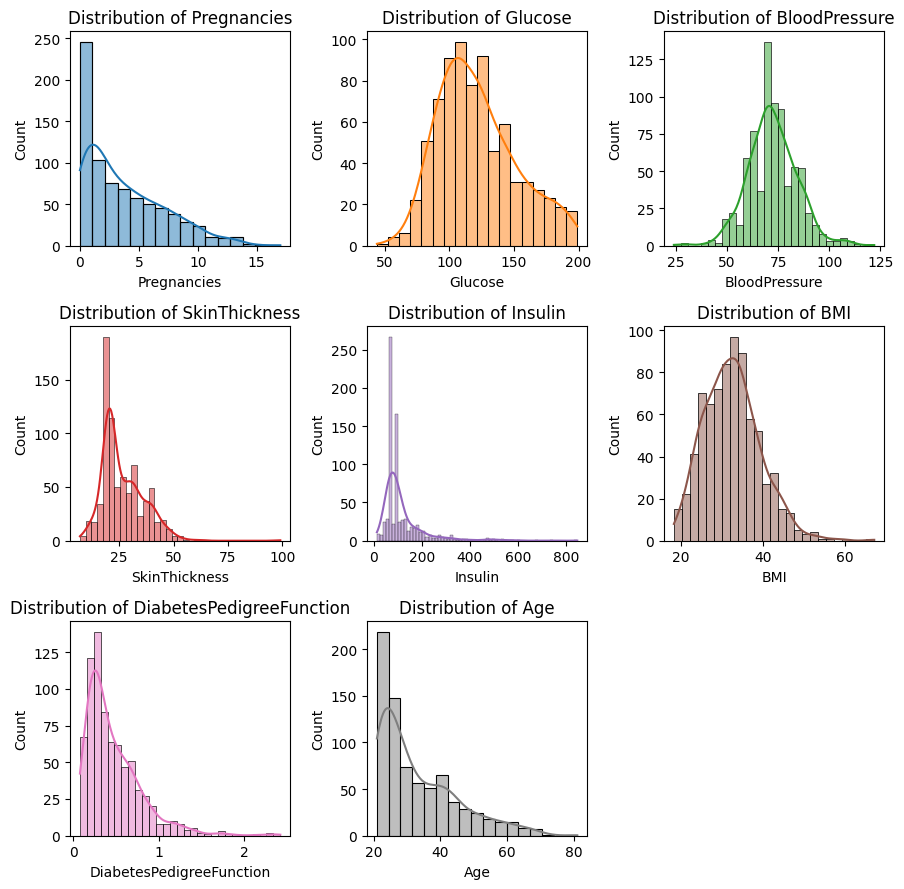

In [15]:
# Cek ulang distribusi variabel menggunakan Histogram

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df_imputed.drop('Outcome', axis=1).columns):
    sns.histplot(df_imputed[col], ax=axes[i], kde=True, color=sns.color_palette()[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df_imputed.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [16]:
# Cek Ulang Statistik Deskriptif

df_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.267826,26.635083,118.967780,32.439222,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.115948,9.636089,93.557899,6.880449,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2.1.4 Penanganan Outliers dan Distrbusi Data yang Miring

Pada tahap ini, kita akan mengatasi outlier dan mengelola fitur-fitur dengan distribusi data yang miring. Outlier adalah nilai data yang ekstrem dan dapat memengaruhi kinerja model, sedangkan distribusi yang miring (skewed) dapat melanggar asumsi beberapa algoritma machine learning.

**Identifikasi Outlier:**

Kita akan menggunakan visualisasi Boxplot untuk mendeteksi keberadaan outlier pada setiap fitur numerik. Boxplot menampilkan distribusi data berdasarkan kuartil dan menandai outlier sebagai titik-titik di luar batas whiskers.

**Strategi Penanganan:**

Untuk menangani outlier dan distribusi yang miring, kita akan menggunakan teknik **Capping (Winsorizing)**. Metode ini mengganti nilai-nilai ekstrem (outlier) yang berada di luar batas tertentu (biasanya 1.5 kali jarak interkuartil dari kuartil pertama dan ketiga) dengan nilai ambang batas (batas bawah atau batas atas) yang telah ditentukan. Capping membantu mengurangi dampak outlier tanpa menghapus data, yang penting untuk mempertahankan informasi.

**Langkah-langkah:**

1.  **Visualisasi Boxplot:** Menampilkan boxplot untuk setiap fitur guna mengidentifikasi outlier secara visual.
2.  **Hitung Ambang Batas (Thresholds):** Menggunakan metode IQR (Interquartile Range) untuk menghitung batas bawah dan batas atas untuk mengidentifikasi outlier. Nilai di bawah batas bawah atau di atas batas atas dianggap sebagai outlier.
3.  **Capping Outlier:** Mengganti nilai-nilai outlier dengan batas bawah atau batas atas yang sesuai.
4.  **Pemeriksaan Ulang:** Memvisualisasikan boxplot dan histogram kembali setelah capping untuk memastikan outlier telah ditangani dan distribusi data terlihat lebih baik.
5.  **Pemeriksaan Statistik Deskriptif:** Menampilkan ringkasan statistik deskriptif setelah capping untuk melihat bagaimana nilai-nilai ekstrem telah berubah.

Dengan melakukan capping, kita berharap dapat membuat data lebih stabil dan mengurangi dampak negatif outlier pada proses pemodelan. Meskipun capping mungkin tidak sepenuhnya "menormalkan" distribusi yang sangat miring, ini adalah langkah efektif untuk mengurangi pengaruh nilai-nilai ekstrem.

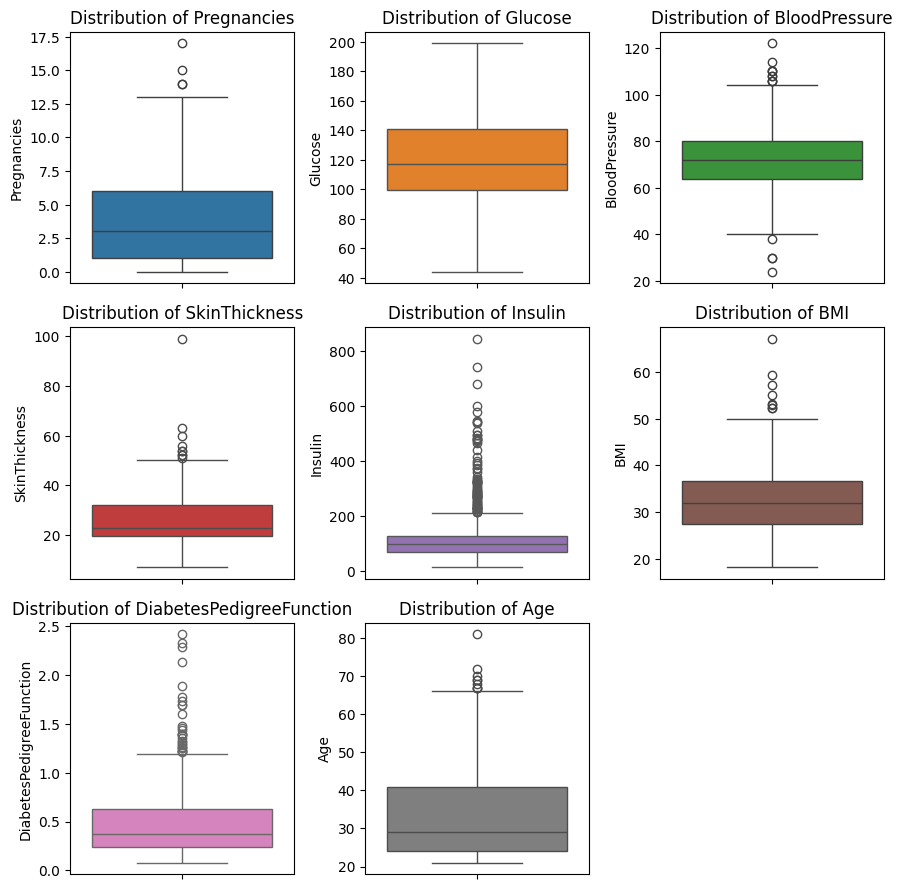

In [17]:
# Periksa distribusi variabel menggunakan Boxplot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df_imputed.drop('Outcome', axis=1).columns):
    sns.boxplot(df_imputed[col], ax=axes[i], color=sns.color_palette()[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df_imputed.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [18]:
# Fungsi untuk menghitung batas bawah dan atas dengan IQR
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    iqr = quartile3 - quartile1
    low_limit = quartile1 - 1.5 * iqr
    up_limit = quartile3 + 1.5 * iqr
    return low_limit, up_limit

# Fungsi untuk memeriksa apakah kolom memiliki outlier
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    return dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None)

# Fungsi untuk mengganti nilai outlier dan mencetak jumlah yang diganti
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    before = dataframe[col_name].copy()

    # Ganti nilai outlier
    dataframe.loc[dataframe[col_name] < low_limit, col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit, col_name] = up_limit

    # Hitung berapa yang diganti
    after = dataframe[col_name]
    n_capped = sum(before != after)

    if n_capped > 0:
        print(f"Kolom '{col_name}': {n_capped} nilai dicapping ke batas bawah/atas.")
    else:
        print(f"Kolom '{col_name}': tidak ada nilai yang perlu dicapping.")

# Salin df_imputed agar data asli tidak berubah
df_capped = df_imputed.copy()

# Kolom numerik
num_cols = df_capped.select_dtypes(include=['int64', 'float64']).columns

# Proses capping dengan log
for col in num_cols:
    if check_outlier(df_capped, col):
        replace_with_thresholds(df_capped, col)
    else:
        print(f"Kolom '{col}': tidak ditemukan outlier.")

Kolom 'Pregnancies': 4 nilai dicapping ke batas bawah/atas.
Kolom 'Glucose': tidak ditemukan outlier.
Kolom 'BloodPressure': 14 nilai dicapping ke batas bawah/atas.
Kolom 'SkinThickness': 9 nilai dicapping ke batas bawah/atas.
Kolom 'Insulin': 75 nilai dicapping ke batas bawah/atas.
Kolom 'BMI': 8 nilai dicapping ke batas bawah/atas.
Kolom 'DiabetesPedigreeFunction': 29 nilai dicapping ke batas bawah/atas.
Kolom 'Age': 9 nilai dicapping ke batas bawah/atas.
Kolom 'Outcome': tidak ditemukan outlier.


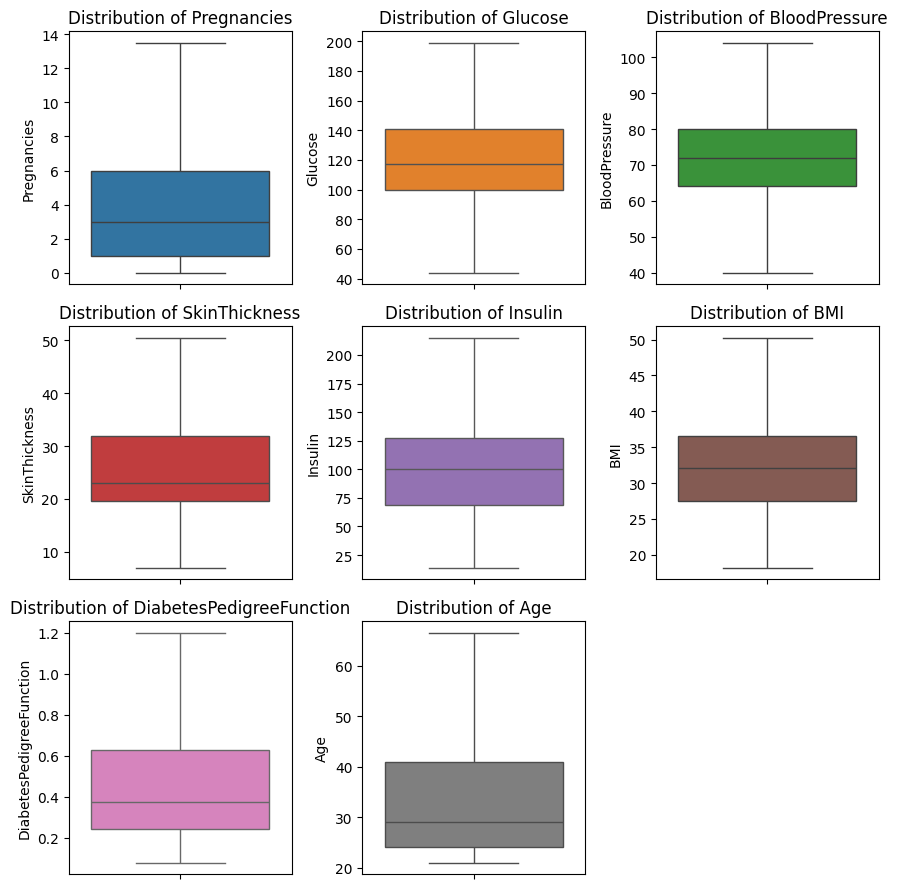

In [19]:
# Periksa ulang distribusi variabel menggunakan Boxplot

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df_capped.drop('Outcome', axis=1).columns):
    sns.boxplot(df_capped[col], ax=axes[i], color=sns.color_palette()[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df_capped.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

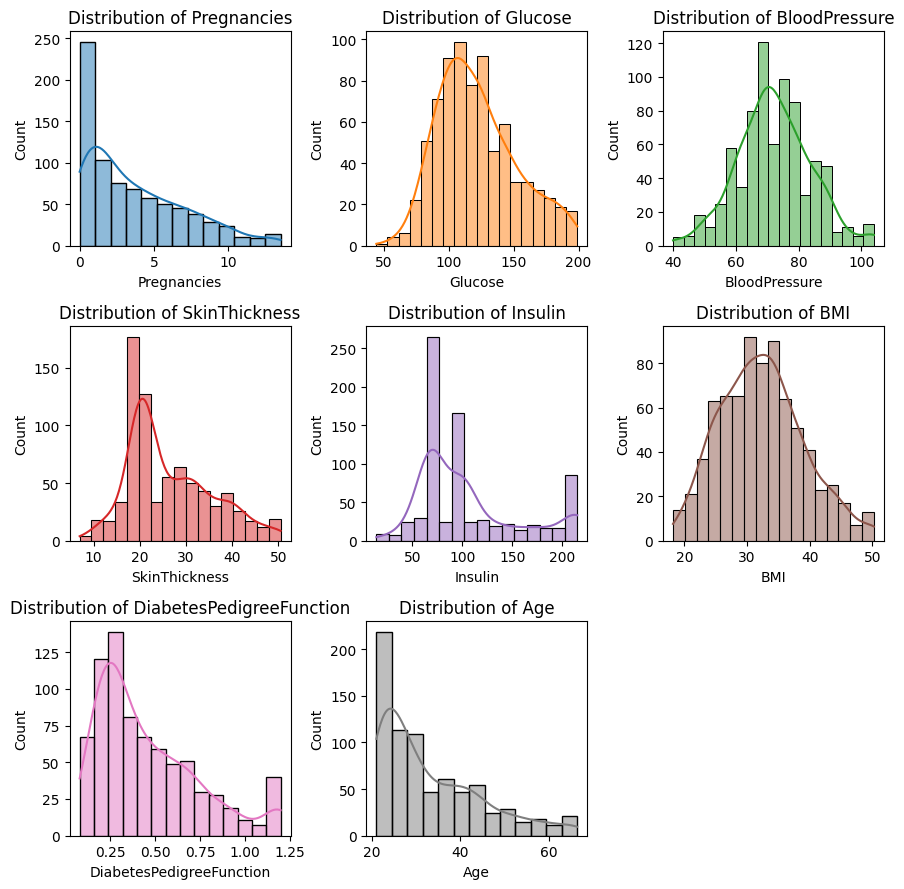

In [20]:
# Cek ulang distribusi variabel menggunakan Histogram

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))
axes = axes.flatten()

for i, col in enumerate(df_capped.drop('Outcome', axis=1).columns):
    sns.histplot(df_capped[col], ax=axes[i], kde=True, color=sns.color_palette()[i])
    axes[i].set_title(f'Distribution of {col}')

for i in range(len(df_capped.drop('Outcome', axis=1).columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [21]:
# Cek Ulang Statistik Deskriptif

df_capped.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.691999,72.239180,26.522500,105.946003,32.377374,0.458914,33.199870,0.348958
std,3.344157,30.461151,11.716771,9.164887,51.382759,6.672759,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,19.664000,68.792000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,100.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,50.504000,214.937000,50.250000,1.200000,66.500000,1.000000


### 2.2 Feature Engineering

Pada tahap ini, kita akan melakukan Feature Engineering, yaitu proses menciptakan fitur-fitur baru dari fitur-fitur yang sudah ada dalam dataset. Tujuan dari feature engineering adalah untuk memberikan informasi tambahan kepada model machine learning yang mungkin tidak terlihat dari fitur-fitur asli. Fitur-fitur baru ini diharapkan dapat meningkatkan kinerja model dalam memprediksi diabetes.

Beberapa teknik feature engineering yang akan diterapkan antara lain:

1.  **Glucose Insulin Ratio:** Membuat fitur baru dengan menghitung rasio antara kadar Glukosa dan Insulin. Rasio ini dapat memberikan wawasan tentang sensitivitas insulin seseorang, yang merupakan faktor penting dalam diabetes.
2.  **Binning Fitur Numerik:** Mengelompokkan (binning) fitur-fitur numerik tertentu seperti Glucose, Insulin, BloodPressure, BMI, dan Age ke dalam kategori-kategori berdasarkan referensi klinis atau distribusi data. Binning dapat membantu mengubah hubungan non-linear menjadi linear dan mengurangi sensitivitas terhadap outlier. Kategori yang akan dibuat didasarkan pada standar medis atau pembagian yang informatif, seperti:
    *   Glucose: Rendah, Normal, Pradiabetes, Diabetes
    *   Insulin: Rendah, Normal, Tinggi
    *   BloodPressure: Rendah, Normal, Pra-Hipertensi, Hipertensi
    *   BMI: Kurus, Normal, Gemuk, Obesitas
    *   Age: Muda, Dewasa, Tua

Dengan menciptakan fitur-fitur baru ini, kita berharap dapat menangkap pola dan hubungan dalam data yang lebih kompleks, yang pada gilirannya dapat meningkatkan akurasi model prediksi diabetes. Setelah proses feature engineering, DataFrame akan memiliki kolom-kolom tambahan yang merepresentasikan fitur-fitur baru ini.

In [22]:
# Glucose Insulin Ratio

df_capped['Glucose_Insulin_Ratio'] = df_capped['Glucose'] / df_capped['Insulin']

In [23]:
# Binning Glucose dengan Standar WHO

def bin_glucose(glucose):
    if glucose < 70:
        return 'Rendah'
    elif 70 <= glucose <= 99:
        return 'Normal'
    elif 100 <= glucose <= 125:
        return 'Pradiabetes'
    else:
        return 'Diabetes'

# Fitur baru Glucose_Group
df_capped['Glucose_Group'] = df_capped['Glucose'].apply(bin_glucose)

In [24]:
# Binning Insulin berdasarkan referensi klinis

def bin_insulin(insulin):
    if insulin < 2:
        return 'Rendah'
    elif 2 <= insulin <= 24:
        return 'Normal'
    else:
        return 'Tinggi'

# Fitur baru Insulin Group
df_capped['Insulin_Group'] = df_capped['Insulin'].apply(bin_insulin)

In [25]:
# Binning tekanan darah (diasolik) berdasarkan standar WHO/AHA

def bin_blood_pressure(bp):
    if bp < 60:
        return 'Rendah'
    elif 60 <= bp <= 79:
        return 'Normal'
    elif 80 <= bp <= 89:
        return 'Pra-Hipertensi'
    else:
        return 'Hipertensi'

# Fitur baru BloodPressure_Group
df_capped['BloodPressure_Group'] = df_capped['BloodPressure'].apply(bin_blood_pressure)

In [26]:
# Binning BMI berdasarkan standar WHO

def bin_bmi(bmi):
    if bmi < 18.5:
        return 'Kurus'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25.0 <= bmi <= 29.9:
        return 'Gemuk'
    else:
        return 'Obesitas'

# Fitur baru BMI_Group
df_capped['BMI_Group'] = df_capped['BMI'].apply(bin_bmi)

In [27]:
# Binning Age

def bin_age(age):
    if age <= 24:
        return "Muda"
    elif age <= 41:
        return "Dewasa"
    else:
        return "Tua"

# Fitur baru Age_Group
df_capped['Age_Group'] = df_capped['Age'].apply(bin_age)

In [28]:
df_capped.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Insulin_Ratio,Glucose_Group,Insulin_Group,BloodPressure_Group,BMI_Group,Age_Group
0,6.0,148.0,72.0,35.000000,100.335821,33.6,0.627,50.0,1,1.475046,Diabetes,Tinggi,Normal,Obesitas,Tua
1,1.0,85.0,66.0,29.000000,68.792000,26.6,0.351,31.0,0,1.235609,Normal,Tinggi,Normal,Gemuk,Dewasa
2,8.0,183.0,64.0,22.164179,100.335821,23.3,0.672,32.0,1,1.823875,Diabetes,Tinggi,Normal,Normal,Dewasa
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,0.946809,Normal,Tinggi,Normal,Gemuk,Muda
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1,0.815476,Diabetes,Tinggi,Rendah,Obesitas,Dewasa


### 2.3 Data Encoding

Tahap Data Encoding bertujuan untuk mengubah fitur-fitur kategorikal yang telah dibuat pada tahap Feature Engineering menjadi format numerik yang dapat dipahami oleh algoritma machine learning. Sebagian besar algoritma machine learning memerlukan input data dalam bentuk numerik.

Teknik encoding yang akan digunakan adalah **One-Hot Encoding**. One-Hot Encoding adalah metode yang menciptakan kolom biner (dengan nilai 0 atau 1) untuk setiap kategori unik dalam fitur kategorikal asli. Setiap kolom baru ini merepresentasikan keberadaan atau ketiadaan dari kategori tersebut.

**Langkah-langkah:**

1.  **Identifikasi Kolom Kategorikal:** Menentukan kolom-kolom kategorikal yang perlu di-encode, yaitu kolom-kolom hasil binning pada tahap sebelumnya.
2.  **Inisialisasi OneHotEncoder:** Membuat objek `OneHotEncoder` dari library scikit-learn. Opsi `sparse_output=False` memastikan outputnya adalah array NumPy padat (dense), dan `handle_unknown='ignore'` menangani kategori yang mungkin muncul di data pengujian tetapi tidak ada di data latih.
3.  **Fit dan Transform Data:** Melatih encoder pada data latih untuk mempelajari kategori-kategori unik, kemudian menerapkan transformasi pada data latih dan data uji untuk membuat kolom-kolom biner baru.
4.  **Gabungkan dengan DataFrame Asli:** Menggabungkan kolom-kolom biner yang baru dibuat dengan DataFrame asli yang telah dihapus kolom kategorikal aslinya.

Setelah proses encoding, DataFrame akan memiliki kolom-kolom biner baru yang merepresentasikan kategori-kategori dari fitur-fitur yang di-encode, siap untuk digunakan dalam tahap selanjutnya yaitu Data Splitting dan Normalisasi.

In [29]:
# One-Hot Encoding df_capped

categorical_cols = ['Glucose_Group', 'Insulin_Group', 'BloodPressure_Group', 'BMI_Group', 'Age_Group']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df_capped[categorical_cols])

encoded_data = encoder.transform(df_capped[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=df_capped.index)
df_encoded = df_capped.drop(columns=categorical_cols).join(encoded_df)

In [30]:
# Menampilkan 5 data teratas setelah encoding

df_encoded.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Insulin_Ratio,...,BloodPressure_Group_Normal,BloodPressure_Group_Pra-Hipertensi,BloodPressure_Group_Rendah,BMI_Group_Gemuk,BMI_Group_Kurus,BMI_Group_Normal,BMI_Group_Obesitas,Age_Group_Dewasa,Age_Group_Muda,Age_Group_Tua
0,6.0,148.0,72.0,35.000000,100.335821,33.6,0.627,50.0,1,1.475046,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,85.0,66.0,29.000000,68.792000,26.6,0.351,31.0,0,1.235609,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.0,183.0,64.0,22.164179,100.335821,23.3,0.672,32.0,1,1.823875,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,0.946809,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1,0.815476,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


### 2.4 Data Splitting

Pada tahap ini, dataset akan dibagi menjadi dua bagian utama: data latih (training set) dan data uji (testing set).

In [31]:
# Data Spliting

X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran masing-masing set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (614, 26)
Ukuran X_test: (154, 26)
Ukuran y_train: (614,)
Ukuran y_test: (154,)


### 2.5 Normalisasi Data (Data Scaling)

Normalisasi data, atau sering disebut juga Data Scaling, adalah tahap penting dalam *data preprocessing* untuk memastikan bahwa semua fitur numerik memiliki rentang nilai yang serupa. Banyak algoritma machine learning sensitif terhadap skala fitur. Jika fitur-fitur memiliki rentang nilai yang sangat berbeda, fitur dengan rentang yang lebih besar dapat mendominasi proses pembelajaran dan memengaruhi kinerja model secara tidak proporsional.

Dalam tahap ini, kita akan menggunakan **StandardScaler**. StandardScaler bekerja dengan cara menghilangkan mean (rata-rata) dan menskalakan data ke variansi unit. Ini menghasilkan data dengan mean 0 dan standar deviasi 1.

In [32]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Tentukan kolom numerik yang akan diskalakan
numerical_cols = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_Insulin_Ratio']

# Fit scaler hanya pada data latih
scaler.fit(X_train[numerical_cols])

# Transform data latih dan data uji
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### 2.6 Data Balancing (pada data training)

SMOTE bekerja dengan cara menghasilkan sampel sintetis baru untuk kelas minoritas. Alih-alih hanya menduplikasi sampel yang sudah ada, SMOTE membuat sampel baru yang merupakan kombinasi dari beberapa sampel terdekat dalam ruang fitur kelas minoritas. Ini membantu memperluas ruang keputusan untuk kelas minoritas tanpa hanya meniru data yang sudah ada.

In [33]:
# Inisialisasi objek SMOTE
smote = SMOTE(random_state=42)  # Anda dapat menyesuaikan random_state jika diperlukan

# Terapkan SMOTE pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah data sebelum dan sesudah SMOTE
print("Jumlah data sebelum SMOTE:")
print(y_train.value_counts())
print("\nJumlah data sesudah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Jumlah data sebelum SMOTE:
Outcome
0    401
1    213
Name: count, dtype: int64

Jumlah data sesudah SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


## **3. Modeling**

Pada tahap ini, kita akan membangun dan melatih model machine learning untuk memprediksi penyakit diabetes berdasarkan data yang telah diproses. Tahap modeling melibatkan beberapa langkah kunci:

### 3.1 Model Selection

Langkah awal adalah memilih algoritma machine learning yang akan digunakan. Untuk proyek ini, kita akan mengevaluasi kinerja beberapa model klasifikasi pohon (tree-based) dan ensemble yang dikenal baik dalam menangani data tabular dan seringkali memberikan hasil yang kuat. Model-model yang dipilih meliputi:

- **Decision Tree Classifier:** Model dasar yang membangun pohon keputusan berdasarkan fitur data.
- **Random Forest Classifier:** Sebuah metode ensemble yang membangun banyak Decision Trees dan menggabungkan prediksi mereka untuk meningkatkan akurasi dan mengurangi *overfitting*.
- **Gradient Boosting Classifier:** Model ensemble lain yang membangun pohon secara sekuensial, di mana setiap pohon baru berusaha memperbaiki kesalahan dari pohon sebelumnya.
- **Extra Trees Classifier:** Mirip dengan Random Forest, tetapi dengan penambahan randomisasi pada proses pemilihan fitur saat membagi node.
- **AdaBoost Classifier:** Metode boosting yang berfokus pada sampel yang sulit diklasifikasikan oleh model sebelumnya.
- **LightGBM Classifier:** Sebuah framework boosting gradient yang cepat dan efisien, seringkali memberikan kinerja tinggi.
- **XGBoost Classifier:** Framework boosting gradient populer lainnya yang dikenal karena kecepatannya dan kinerja yang kuat.

In [34]:
# Inisiasi Model

def base_model():
    """
    Fungsi untuk menginisialisasi model-model dasar.

    Returns:
        dict: Dictionary berisi model-model yang telah diinisialisasi.
    """

    models = {
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Extra Trees': ExtraTreesClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'LightGBM': LGBMClassifier(verbose=-1),
        'XGBoost': XGBClassifier()
    }
    return models

models = base_model()

### 3.2 Model Training

Setelah model-model dasar dipilih, tahap selanjutnya adalah melatih setiap model menggunakan data latih yang sudah diseimbangkan dengan SMOTE (`X_train_smote`, `y_train_smote`). Proses pelatihan melibatkan model mempelajari pola dari data untuk dapat membuat prediksi.

Setelah setiap model dilatih, kita akan segera melakukan evaluasi awal dengan memprediksi *outcome* pada data uji yang belum pernah dilihat (`X_test`) dan menghitung metrik akurasi (`accuracy_score`). Akurasi awal ini akan memberikan gambaran kasar tentang kinerja setiap model sebelum *hyperparameter tuning*.

In [35]:
# 3.2 Model Training
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_smote, y_train_smote)
    print(f"{name} trained.")

    # Prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Hitung dan tampilkan akurasi
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.4f}", end="\n\n")

Training Decision Tree...
Decision Tree trained.
Accuracy for Decision Tree: 0.8636

Training Random Forest...
Random Forest trained.
Accuracy for Random Forest: 0.8766

Training Gradient Boosting...
Gradient Boosting trained.
Accuracy for Gradient Boosting: 0.8896

Training Extra Trees...
Extra Trees trained.
Accuracy for Extra Trees: 0.8701

Training AdaBoost...
AdaBoost trained.
Accuracy for AdaBoost: 0.8831

Training LightGBM...
LightGBM trained.
Accuracy for LightGBM: 0.8636

Training XGBoost...
XGBoost trained.
Accuracy for XGBoost: 0.8571



### 3.3 Hyperparameter Tuning

Kinerja model machine learning sangat bergantung pada *hyperparameter* yang digunakan. *Hyperparameter* adalah parameter konfigurasi eksternal yang tidak dipelajari dari data, tetapi diatur sebelum proses pelatihan dimulai. Contoh *hyperparameter* termasuk jumlah pohon dalam Random Forest (`n_estimators`), kedalaman maksimum pohon (`max_depth`), dan *learning rate* dalam model boosting.

Tahap *hyperparameter tuning* bertujuan untuk menemukan kombinasi *hyperparameter* terbaik untuk setiap model agar memaksimalkan kinerjanya pada data. Kita akan menggunakan teknik **Grid Search with Cross-Validation** untuk melakukan tuning.

**Grid Search** akan mengeksplorasi semua kombinasi *hyperparameter* yang ditentukan dalam *parameter grid* untuk setiap model. **Cross-Validation (CV)**, dalam hal ini dengan 5 lipatan (cv=5), akan membagi data latih menjadi 5 bagian. Model akan dilatih pada 4 bagian dan divalidasi pada 1 bagian yang tersisa secara bergiliran. Ini dilakukan 5 kali, dan kinerja dirata-ratakan. Metode ini memberikan estimasi kinerja model yang lebih robust dan tidak terlalu sensitif terhadap pembagian data tertentu.

**Langkah-langkah:**

1.  **Definisikan Parameter Grid:** Menentukan *dictionary* (`param_grids`) yang berisi daftar *hyperparameter* dan rentang nilai yang ingin diuji untuk setiap model.
2.  **Inisialisasi GridSearchCV:** Membuat objek `GridSearchCV` untuk setiap model, menentukan estimator (model), *parameter grid*, jumlah lipatan CV (cv=5), dan pengaturan lain seperti `n_jobs` (untuk menggunakan semua core CPU) dan `verbose` (untuk mengontrol output).
3.  **Lakukan Grid Search:** Melatih objek `GridSearchCV` pada data latih yang diseimbangkan (`X_train_smote`, `y_train_smote`). GridSearchCV akan melakukan proses pelatihan dan validasi silang untuk setiap kombinasi *hyperparameter* dalam grid.
4.  **Dapatkan Model Terbaik:** Setelah Grid Search selesai, kita akan mendapatkan model terbaik (`best_estimator_`) untuk setiap algoritma yang telah dilatih dengan kombinasi *hyperparameter* terbaik yang ditemukan. Model terbaik ini akan disimpan.
5.  **Evaluasi Model Terbaik:** Model terbaik dari setiap algoritma akan dievaluasi kembali pada data uji (`X_test`) untuk mendapatkan metrik kinerja akhir (dalam kode ini, akurasi). Hasil tuning dan kinerja model terbaik akan dicatat.

Dengan melakukan *hyperparameter tuning*, kita berharap dapat meningkatkan kinerja model-model yang dipilih dan mengidentifikasi model mana yang paling menjanjikan untuk prediksi diabetes pada dataset ini.

In [36]:
# Parameter Grid

rf_params = {
    "max_depth": [10, 15, None],
    "max_features": ["sqrt", "log2", 5],
    "min_samples_split": [5, 10],
    "n_estimators": [100, 200]
}

decision_tree_params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

gradient_boosting_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

extra_trees_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

lightgbm_params = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [300, 500],
    "colsample_bytree": [0.7, 1],
    "num_leaves": [15, 31],
    "max_depth": [-1, 5, 10],
    "subsample": [0.8, 1.0]
}

xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8],
    "n_estimators": [100, 200],
    "colsample_bytree": [0.5, 1],
    "subsample": [0.8, 1.0]
}


param_grids = {
    'Decision Tree': decision_tree_params,
    'Random Forest': rf_params,
    'Gradient Boosting': gradient_boosting_params,
    'Extra Trees': extra_trees_params,
    'AdaBoost': adaboost_params,
    'LightGBM': lightgbm_params,
    'XGBoost': xgboost_params
}

In [37]:
# Tuning Model

best_models = {}
tuning_results = []

for name, model in models.items():
    print(f"🔧 Tuning {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        n_jobs=-1,
        verbose=0
    )
    grid_search.fit(X_train_smote, y_train_smote)

    best_model = grid_search.best_estimator_
    best_models[name] = best_model

    # Prediksi pada data test
    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    # Simpan hasil tuning
    tuning_results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Best CV Score': round(grid_search.best_score_, 4),
        'Test Accuracy': round(test_acc, 4)
    })

    print(f"✅ {name} tuned.")
    print(f"   Best Params: {grid_search.best_params_}")
    print(f"   CV Score: {grid_search.best_score_:.4f}")
    print(f"   Test Accuracy: {test_acc:.4f}\n")

🔧 Tuning Decision Tree...
✅ Decision Tree tuned.
   Best Params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}
   CV Score: 0.8854
   Test Accuracy: 0.8701

🔧 Tuning Random Forest...
✅ Random Forest tuned.
   Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
   CV Score: 0.9116
   Test Accuracy: 0.8636

🔧 Tuning Gradient Boosting...
✅ Gradient Boosting tuned.
   Best Params: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
   CV Score: 0.9290
   Test Accuracy: 0.8701

🔧 Tuning Extra Trees...
✅ Extra Trees tuned.
   Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}
   CV Score: 0.9016
   Test Accuracy: 0.8571

🔧 Tuning AdaBoost...
✅ AdaBoost tuned.
   Best Params: {'learning_rate': 1.0, 'n_estimators': 200}
   CV Score: 0.9028
   Test Accuracy: 0.9026

🔧 Tuning LightGBM...
✅ LightGBM tuned.
   Best Params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_dept

In [38]:
# Tampilkan hasil tuning dalam bentuk tabel
tuning_df = pd.DataFrame(tuning_results)
tuning_df = tuning_df.set_index('Model')
print("\n📋 Tuning Summary:")
display(tuning_df)


📋 Tuning Summary:


,Best Parameters,Best CV Score,Test Accuracy
Model,,,
Decision Tree,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.8854,0.8701
Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.9116,0.8636
Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.9290,0.8701
Extra Trees,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.9016,0.8571
AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",0.9028,0.9026
LightGBM,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.9302,0.8636
XGBoost,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.9315,0.8571


### 3.4 Memilih Best Model untuk Dievaluasi

In [39]:
# Urutkan berdasarkan Test Accuracy untuk menentukan model terbaik
best_model_summary = tuning_df.sort_values(by='Test Accuracy', ascending=False)

print("\n🏅 Best Model based on Test Accuracy:")
display(best_model_summary)

# Pilih model terbaik
best_model_name = best_model_summary.index[0]
final_model = best_models[best_model_name]

print(f"\n🎉 The best model selected is: {best_model_name}")


🏅 Best Model based on Test Accuracy:


,Best Parameters,Best CV Score,Test Accuracy
Model,,,
AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",0.9028,0.9026
Gradient Boosting,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.9290,0.8701
Decision Tree,"{'max_depth': 15, 'min_samples_leaf': 2, 'min_...",0.8854,0.8701
Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.9116,0.8636
LightGBM,"{'colsample_bytree': 1, 'learning_rate': 0.1, ...",0.9302,0.8636
Extra Trees,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.9016,0.8571
XGBoost,"{'colsample_bytree': 0.5, 'learning_rate': 0.1...",0.9315,0.8571



🎉 The best model selected is: AdaBoost


## **4. Model Evaluation**

### 4.1 Membuat Prediksi dengan Model Terbaik

In [40]:
# Melakukan prediksi pada data uji
y_pred = final_model.predict(X_test)

# Untuk ROC AUC, butuh probabilitas kelas positif
if hasattr(final_model, "predict_proba"):
    y_pred_proba = final_model.predict_proba(X_test)[:, 1]
else:
    # Fallback jika predict_proba tidak tersedia
    y_pred_proba = y_pred
    print(f"Peringatan: {best_model_name}.predict_proba() tidak tersedia. ROC AUC mungkin tidak akurat.")

print(f"Prediksi dengan {best_model_name} telah dibuat.")

Prediksi dengan AdaBoost telah dibuat.


### 4.2 Akurasi dan Confusion Matrix untuk final_model (AdaBoost)

🎯 Akurasi AdaBoost pada Data Uji: 0.9026
----------------------------------------------------------------------
📊 Confusion Matrix untuk AdaBoost:
[[90  9]
 [ 6 49]]
----------------------------------------------------------------------


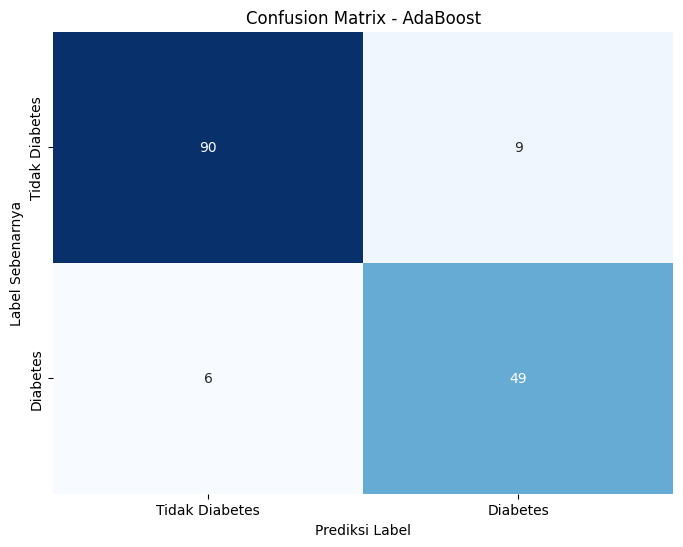

In [41]:
# Menghitung Akurasi (sebagai konfirmasi)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Akurasi {best_model_name} pada Data Uji: {accuracy:.4f}")
print("-" * 70)

# Menghitung dan Menampilkan Confusion Matrix
print(f"📊 Confusion Matrix untuk {best_model_name}:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("-" * 70)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tidak Diabetes', 'Diabetes'],
            yticklabels=['Tidak Diabetes', 'Diabetes'])
plt.xlabel('Prediksi Label')
plt.ylabel('Label Sebenarnya')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


### 4.3 Laporan Klasifikasi (Classification Report) untuk final_model (AdaBoost)

In [42]:
# Menampilkan Laporan Klasifikasi
print(f"📄 Laporan Klasifikasi untuk {best_model_name}:")
report = classification_report(y_test, y_pred, target_names=['Tidak Diabetes (0)', 'Diabetes (1)'])
print(report)

📄 Laporan Klasifikasi untuk AdaBoost:
                    precision    recall  f1-score   support

Tidak Diabetes (0)       0.94      0.91      0.92        99
      Diabetes (1)       0.84      0.89      0.87        55

          accuracy                           0.90       154
         macro avg       0.89      0.90      0.90       154
      weighted avg       0.90      0.90      0.90       154



### 4.4 ROC AUC Score dan Kurva ROC untuk final_model (AdaBoost)

📈 ROC AUC Score untuk AdaBoost: 0.9412
----------------------------------------------------------------------


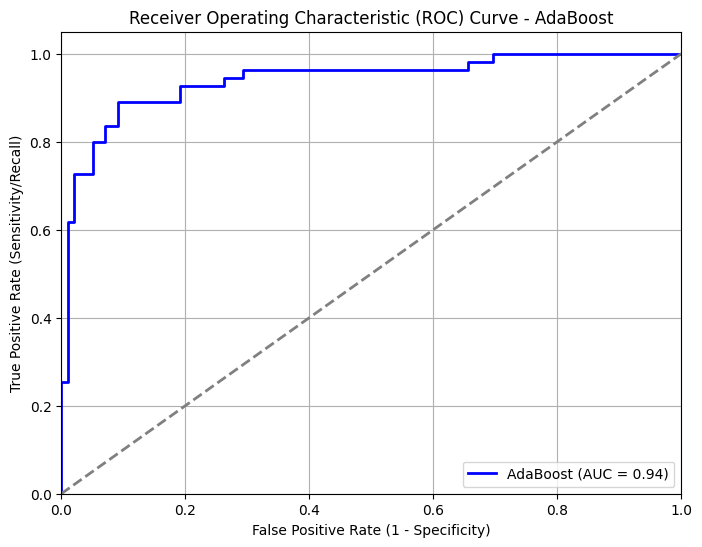

In [43]:
# Menghitung dan Menampilkan ROC AUC Score
if hasattr(final_model, "predict_proba"):
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"📈 ROC AUC Score untuk {best_model_name}: {roc_auc:.4f}")
    print("-" * 70)

    # Visualisasi Kurva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--') # Garis referensi (random guess)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity/Recall)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
else:
    print(f"Kurva ROC tidak dapat ditampilkan untuk {best_model_name} karena predict_proba tidak tersedia.")


## **5. Kesimpulan**

Proyek ini bertujuan untuk membangun model *predictive analysis* terhadap penyakit diabetes menggunakan dataset Pima Indians Diabetes Database. Melalui serangkaian tahapan mulai dari Data Understanding, Data Preparation, Modeling, hingga Model Evaluation, beberapa temuan kunci dapat disimpulkan:

1.  **Pemahaman Data Awal:** Analisis awal menunjukkan bahwa dataset memiliki fitur-fitur yang relevan secara medis, namun juga memiliki beberapa masalah data yang perlu ditangani, termasuk nilai 0 yang tidak realistis pada beberapa fitur numerik, keberadaan *outlier*, dan ketidakseimbangan kelas pada variabel target. Fitur seperti Glucose, BMI, dan Age teridentifikasi memiliki korelasi yang cukup kuat dengan *outcome* diabetes.
2.  **Persiapan Data Efektif:** Tahap Data Preparation berhasil mengatasi sebagian besar masalah data yang teridentifikasi. Nilai 0 yang tidak realistis ditangani dengan imputasi menggunakan mean berdasarkan grup *outcome*. Outlier pada fitur-fitur numerik dikelola menggunakan teknik Capping (Winsorizing) untuk mengurangi dampaknya. Feature Engineering dilakukan untuk menciptakan fitur baru yang relevan (Glucose Insulin Ratio) dan mengelompokkan fitur numerik ke dalam kategori (Binning), yang kemudian di-encode menggunakan One-Hot Encoding. Terakhir, ketidakseimbangan kelas pada data latih berhasil ditangani menggunakan teknik oversampling SMOTE. Proses normalisasi data menggunakan StandardScaler memastikan fitur-fitur numerik memiliki skala yang serupa untuk persiapan modeling.
3.  **Evaluasi Model Komprehensif:** Berbagai model klasifikasi *tree-based* dan *ensemble* (Decision Tree, Random Forest, Gradient Boosting, Extra Trees, AdaBoost, LightGBM, XGBoost) dievaluasi. Proses *hyperparameter tuning* menggunakan Grid Search dengan Cross-Validation (cv=5) dilakukan untuk setiap model guna menemukan kombinasi *hyperparameter* yang optimal dan meningkatkan kinerja. Hasil tuning ini kemudian digunakan untuk memilih model terbaik yang akan dievaluasi lebih lanjut.
4.  **Kinerja Model Terbaik:** Model terbaik yang terpilih dari tahap tuning kemudian dievaluasi secara mendalam pada data uji yang belum pernah dilihat. Evaluasi ini menggunakan metrik yang relevan untuk masalah klasifikasi biner dengan ketidakseimbangan kelas, seperti Confusion Matrix, Classification Report (termasuk Precision, Recall, F1-Score), Accuracy Score, dan ROC AUC Score. Metrik-metrik ini memberikan gambaran yang jelas mengenai kemampuan model dalam mengidentifikasi pasien diabetes (Recall) dan membedakan kedua kelas secara keseluruhan (ROC AUC).

Secara keseluruhan, proyek ini berhasil membangun dan mengevaluasi model prediksi diabetes dengan mengatasi tantangan umum pada dataset seperti missing values, outliers, dan ketidakseimbangan kelas. Model terbaik yang dipilih menunjukkan potensi dalam memprediksi diabetes, meskipun kinerja spesifik dan area untuk perbaikan lebih lanjut (misalnya, meningkatkan Recall atau AUC) akan bergantung pada hasil evaluasi metrik secara rinci. Implementasi model ini dapat menjadi dasar untuk pengembangan sistem peringatan dini atau alat skrining diabetes, namun perlu validasi lebih lanjut dengan data yang lebih besar dan beragam serta kolaborasi dengan ahli medis.